## Desenvolvimento Sustentável - Uma análise com dados

Neste projeto, o meu objetivo é colocar em prática o que aprendi na formação da Alura "Python para Data Science". Com isso, desejo fazer uma análise exploratória de dados (EDA) com um dataset obtido no Kaggle sobre os Objetivos de Desenvolvimento Sustentáveis (ODS).

Importando a base de dados:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dados/sdg_index_2000-2022.csv')

Ver as primeiras linhas do DataFrame:

In [3]:
df.head()

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2


Extrair informações sobre valores não nulos, nome das colunas e seus tipos:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     4140 non-null   object 
 1   country          4140 non-null   object 
 2   year             4140 non-null   int64  
 3   sdg_index_score  4140 non-null   float64
 4   goal_1_score     4140 non-null   float64
 5   goal_2_score     4140 non-null   float64
 6   goal_3_score     4140 non-null   float64
 7   goal_4_score     4140 non-null   float64
 8   goal_5_score     4140 non-null   float64
 9   goal_6_score     4140 non-null   float64
 10  goal_7_score     4140 non-null   float64
 11  goal_8_score     4140 non-null   float64
 12  goal_9_score     4140 non-null   float64
 13  goal_10_score    4140 non-null   float64
 14  goal_11_score    4140 non-null   float64
 15  goal_12_score    4140 non-null   float64
 16  goal_13_score    4140 non-null   float64
 17  goal_14_score 

Conferindo de fato se não temos valores nulos:

In [5]:
df.isna().sum().sum()

0

Conferindo se há valores duplicados:

In [6]:
df.duplicated().sum()

0

Checando os países presentes em nossas amostras:

In [7]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic',
       'East and South Asia', 'Eastern Europe and Central Asia',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'High-income

Selecionando as amostras que queremos remover do DataFrame:

In [8]:
amostras_del = (df['country'] == "East and South Asia") | (df['country'] == "Eastern Europe and Central Asia") | \
(df['country'] == "High-income Countries") | (df['country'] == "Latin America and the Caribbean") | \
(df['country'] == "Lower & Lower-middle Income") | (df['country'] == "Lower-middle-income Countries") | \
(df['country'] == "Low-income Countries") | (df['country'] == "Middle East and North Africa") | \
(df['country'] == "Oceania") | (df['country'] == "OECD members") | (df['country'] == "Small Island Developing States") | \
(df['country'] == "Sub-Saharan Africa") | (df['country'] == "Upper-middle-income Countries") | \
(df['country'] == "World")

Filtrando o nosso dataset somente com as amostras desejadas:

In [9]:
df = df.loc[~amostras_del]

In [10]:
df.describe()

,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,2011.000000,63.850288,64.795233,57.698900,64.306207,72.073808,55.950367,64.523965,57.614013,69.838554,36.964222,52.771163,70.211498,79.268675,81.513332,47.805998,65.104453,62.587166,55.583552
std,6.634118,10.916160,36.836088,11.221834,22.651757,27.008855,17.621801,15.103414,21.871602,10.243085,26.079512,32.127442,18.417139,17.017656,21.895557,28.637462,13.775995,14.843730,13.277460
min,2000.000000,36.000000,0.000000,7.700000,5.900000,0.000000,3.500000,23.300000,0.100000,38.400000,0.000000,0.000000,13.800000,32.900000,0.000000,0.000000,26.000000,27.900000,15.100000
25%,2005.000000,55.100000,30.825000,52.325000,44.900000,55.600000,43.100000,52.600000,41.200000,63.900000,15.400000,23.200000,56.400000,67.825000,71.700000,36.925000,55.100000,51.600000,45.900000
50%,2011.000000,65.400000,81.600000,58.900000,71.150000,81.200000,57.700000,64.900000,65.200000,70.100000,29.000000,57.400000,75.300000,84.500000,90.800000,58.700000,65.100000,61.700000,55.100000
75%,2017.000000,72.300000,98.600000,65.300000,81.700000,94.900000,69.200000,74.700000,72.100000,76.700000,52.700000,80.800000,85.075000,94.100000,97.300000,67.900000,74.300000,74.200000,65.000000
max,2022.000000,86.800000,100.000000,83.400000,97.300000,100.000000,94.000000,95.100000,99.600000,93.600000,99.200000,100.000000,99.900000,99.000000,99.900000,91.200000,97.900000,96.000000,100.000000


**1. Quais são os países mais sustentáveis do mundo ?**

Fazendo uma seleção de 10 países com o maior score médio de Desenvolvimento Sustentável do mundo entre 2000 e 2022:

In [11]:
melhores_scores = round(df.groupby(['country'])['sdg_index_score'].mean().sort_values(ascending=False).head(10),2)
melhores_scores

country
Sweden            85.06
Finland           84.73
Denmark           83.43
Austria           80.71
Norway            80.66
Germany           80.07
United Kingdom    79.16
Switzerland       78.93
France            78.39
Czechia           78.10
Name: sdg_index_score, dtype: float64

Respondendo a primeira pergunta com um gráfico:

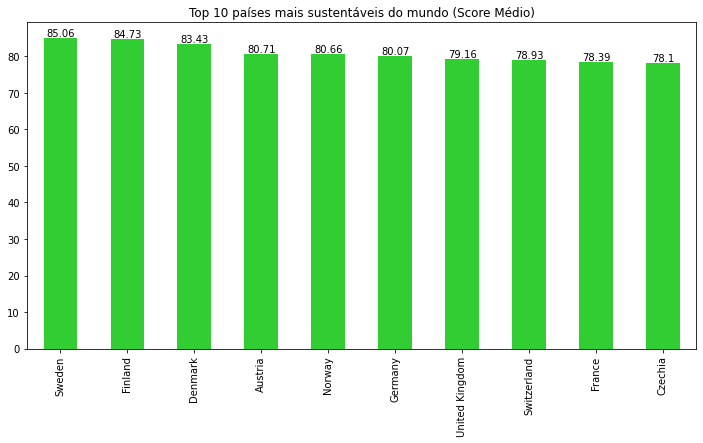

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
fig = melhores_scores.plot(kind='bar',color='limegreen',xlabel='')
fig.set_title('Top 10 países mais sustentáveis do mundo (Score Médio)')
fig.bar_label(fig.containers[0], label_type='edge')
plt.savefig('dados/paises_mais_sustentaveis.png',bbox_inches='tight')

**2. Quais são os países menos sustentáveis do mundo ?**

Vamos utilizar a mesma analogia para responder a primeira questão, mudando apenas o parâmetro "ascending" para True:

In [13]:
piores_scores = round(df.groupby(['country'])['sdg_index_score'].mean().sort_values(ascending=True).head(10),2)
piores_scores

country
South Sudan                 37.35
Central African Republic    38.63
Chad                        40.23
Afghanistan                 40.68
Niger                       43.08
Somalia                     45.08
Congo, Dem. Rep.            46.01
Sudan                       46.14
Liberia                     47.10
Madagascar                  47.47
Name: sdg_index_score, dtype: float64

Plotando o gráfico:

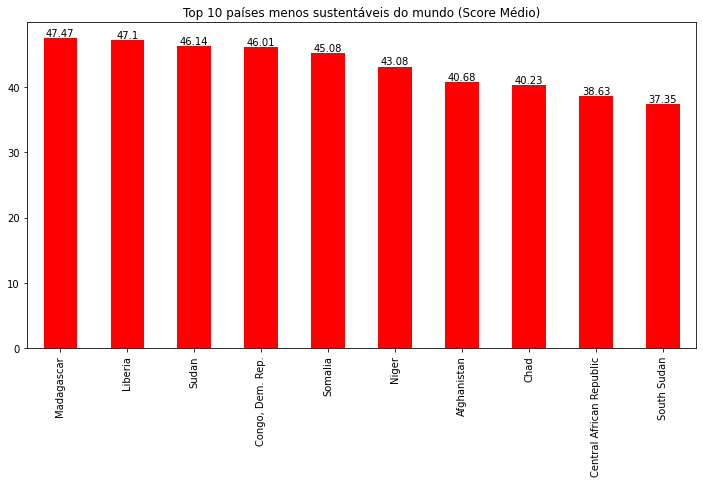

In [14]:
plt.figure(figsize=(12, 6))
fig = piores_scores.sort_values(ascending=False).plot(kind='bar',color='red',xlabel='')
fig.set_title('Top 10 países menos sustentáveis do mundo (Score Médio)')
fig.bar_label(fig.containers[0], label_type='edge')
plt.savefig('dados/paises_menos_sustentaveis.png',bbox_inches='tight')

**3. Com o passar dos anos o mundo está sendo mais sustentável ou menos sustentável ?**

Fazendo a média dos scores entre os anos 2000 e 2022:

In [15]:
score_por_ano = round(df.groupby(['year'])['sdg_index_score'].mean(),2)
score_por_ano

year
2000    60.45
2001    60.65
2002    60.91
2003    61.10
2004    61.39
2005    61.70
2006    62.00
2007    62.23
2008    62.51
2009    62.88
2010    63.27
2011    63.57
2012    64.01
2013    64.37
2014    64.90
2015    65.28
2016    65.59
2017    66.20
2018    66.52
2019    66.90
2020    67.12
2021    67.45
2022    67.55
Name: sdg_index_score, dtype: float64

Plotando o gráfico:

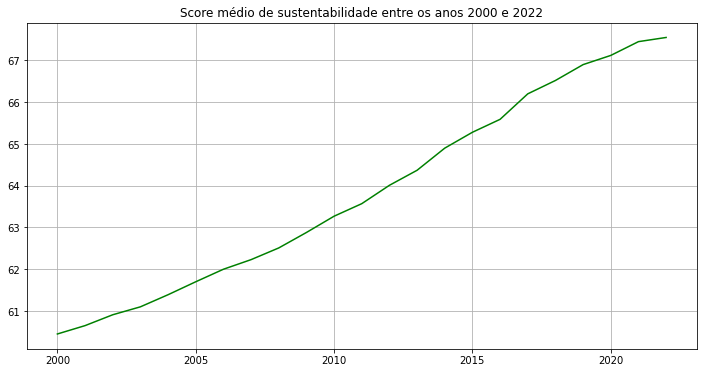

In [16]:
plt.figure(figsize=(12, 6))
fig = score_por_ano.plot(kind='line',color='green',xlabel='')
fig.set_title('Score médio de sustentabilidade entre os anos 2000 e 2022')
fig.grid(True)
plt.savefig('dados/scores_por_ano.png',bbox_inches='tight')

**4. Isso valeu para a média de todos os países do mundo e os mais pobres?**

Fazendo o filtro para obter o índice de score médio por ano e país e em seguinda transformando em DataFrame:

In [17]:
scores_paises_ano = df.groupby(['year', 'country'])['sdg_index_score'].sum().unstack()
scores_paises_ano

country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,"Venezuela, RB",Vietnam,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2000,36.0,65.9,65.3,47.8,66.2,66.9,70.7,78.6,62.3,56.5,...,59.8,76.5,71.5,68.8,60.9,62.9,63.5,46.8,47.1,52.0
2001,36.3,65.9,66.1,47.7,66.1,67.2,70.9,78.8,63.7,56.9,...,60.1,76.8,71.6,69.0,61.2,63.1,63.7,46.9,47.2,52.0
2002,36.3,65.7,66.0,47.4,66.3,67.4,71.4,78.5,66.4,57.0,...,60.0,77.3,71.6,69.2,62.1,62.7,64.2,47.0,47.5,52.0
2003,36.7,65.7,66.6,47.8,66.7,67.8,70.9,78.7,66.5,57.2,...,59.8,77.4,71.8,69.3,61.8,63.0,64.5,47.6,47.7,52.1
2004,37.1,66.2,67.2,47.7,67.0,67.1,71.4,79.1,66.9,57.3,...,60.0,77.4,72.0,69.3,62.3,63.8,64.8,47.7,46.5,52.5
2005,37.5,66.5,67.7,47.8,67.8,67.5,71.5,79.3,67.0,57.5,...,60.8,77.8,72.0,69.6,62.6,63.9,65.3,48.5,47.1,52.4
2006,37.6,66.6,68.4,48.6,67.9,68.9,71.7,79.4,67.2,57.4,...,61.0,77.5,72.2,69.6,63.1,64.6,66.0,48.9,47.3,52.5
2007,38.0,66.8,68.3,49.0,68.1,69.0,71.5,79.6,67.6,57.4,...,61.5,77.4,72.6,70.0,63.3,64.9,65.8,49.0,47.4,52.2
2008,37.3,67.5,68.3,51.4,68.3,69.5,71.5,79.7,67.9,57.5,...,61.5,77.9,72.4,70.4,63.2,64.3,66.7,49.6,48.4,51.9


Selecionando apenas os países menos sustentáveis:

In [18]:
paises_menos_sustentaveis_por_ano = []
for i in scores_paises_ano:
    if scores_paises_ano[i].mean() <= 47.48:
        paises_menos_sustentaveis_por_ano.append(scores_paises_ano[i])
paises_menos_sustentaveis_por_ano

[year
 2000    36.0
 2001    36.3
 2002    36.3
 2003    36.7
 2004    37.1
 2005    37.5
 2006    37.6
 2007    38.0
 2008    37.3
 2009    38.3
 2010    38.8
 2011    38.4
 2012    39.7
 2013    39.7
 2014    40.8
 2015    41.6
 2016    44.7
 2017    45.6
 2018    46.3
 2019    46.4
 2020    47.3
 2021    46.3
 2022    49.0
 Name: Afghanistan, dtype: float64,
 year
 2000    38.4
 2001    38.4
 2002    38.4
 2003    38.4
 2004    38.6
 2005    38.8
 2006    38.7
 2007    38.7
 2008    39.0
 2009    39.0
 2010    39.0
 2011    38.8
 2012    39.0
 2013    38.2
 2014    38.3
 2015    38.0
 2016    37.4
 2017    38.6
 2018    38.6
 2019    38.5
 2020    38.6
 2021    38.8
 2022    40.4
 Name: Central African Republic, dtype: float64,
 year
 2000    38.6
 2001    38.7
 2002    38.8
 2003    38.8
 2004    38.7
 2005    38.7
 2006    38.7
 2007    38.7
 2008    39.4
 2009    38.9
 2010    39.6
 2011    39.0
 2012    39.9
 2013    40.9
 2014    40.7
 2015    40.6
 2016    40.2
 2017    40.4
 

Transformando a lista em um DataFrame:

In [19]:
paises_menos_sustentaveis_por_ano = pd.DataFrame(paises_menos_sustentaveis_por_ano)
paises_menos_sustentaveis_por_ano

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Afghanistan,36.0,36.3,36.3,36.7,37.1,37.5,37.6,38.0,37.3,38.3,...,39.7,40.8,41.6,44.7,45.6,46.3,46.4,47.3,46.3,49.0
Central African Republic,38.4,38.4,38.4,38.4,38.6,38.8,38.7,38.7,39.0,39.0,...,38.2,38.3,38.0,37.4,38.6,38.6,38.5,38.6,38.8,40.4
Chad,38.6,38.7,38.8,38.8,38.7,38.7,38.7,38.7,39.4,38.9,...,40.9,40.7,40.6,40.2,40.4,42.1,42.1,42.7,43.7,45.3
"Congo, Dem. Rep.",44.4,44.4,44.4,44.3,44.5,44.5,44.6,44.9,44.9,45.1,...,45.9,46.3,47.0,47.1,47.4,47.7,47.8,48.4,48.8,48.6
Liberia,43.0,43.2,43.1,44.3,43.6,45.2,45.3,45.9,46.1,46.2,...,48.4,50.2,50.2,50.0,49.8,49.6,49.6,49.6,49.9,49.9
Madagascar,42.9,43.4,43.9,44.4,44.7,46.7,46.9,47.2,47.7,47.9,...,47.7,48.3,48.1,48.8,49.3,49.9,49.9,50.0,50.5,50.3
Niger,38.2,38.2,38.3,38.2,38.5,39.6,40.2,42.4,41.7,42.4,...,45.1,44.5,44.8,44.8,46.9,46.2,46.9,46.8,47.1,48.3
Somalia,43.2,43.3,43.3,43.3,43.4,43.6,43.6,43.7,43.8,43.8,...,45.2,45.3,46.3,46.2,46.9,47.2,47.4,47.6,48.0,48.0
South Sudan,37.4,37.4,37.4,37.4,37.5,37.5,37.8,37.8,37.8,37.9,...,37.2,37.4,36.6,36.6,36.4,36.6,36.8,36.7,37.0,38.7
Sudan,43.6,43.7,43.7,44.1,44.3,44.9,45.4,45.7,45.1,45.7,...,45.7,46.4,46.9,48.2,48.4,48.8,48.7,48.6,48.6,48.6


Plotando um grafico com os paises menos sustentáveis a cada ano:

<Figure size 1080x720 with 0 Axes>

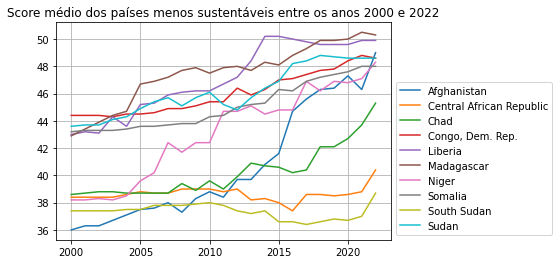

In [20]:
plt.figure(figsize=(15, 10))
fig = paises_menos_sustentaveis_por_ano.T.plot(kind='line',xlabel='')
fig.set_title('Score médio dos países menos sustentáveis entre os anos 2000 e 2022')
fig.legend(bbox_to_anchor=(1, 0.75))
fig.grid(True)
plt.savefig('dados/menos_sustentaveis_por_ano.png',bbox_inches='tight')

Resumindo todos os países em uma só linha:

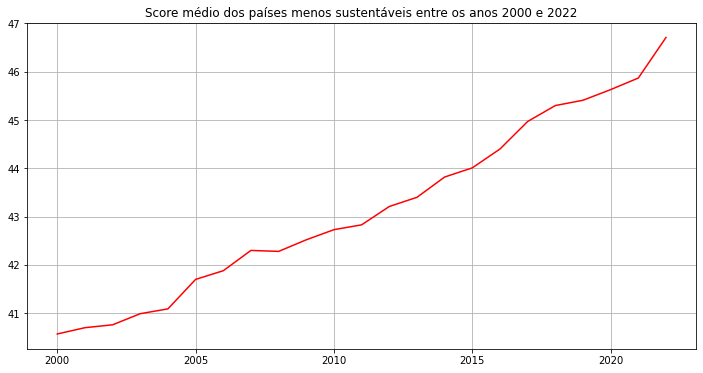

In [21]:
plt.figure(figsize=(12, 6))
fig = paises_menos_sustentaveis_por_ano.mean().plot(kind='line',color='red',xlabel='')
fig.set_title('Score médio dos países menos sustentáveis entre os anos 2000 e 2022')
fig.grid(True)
plt.savefig('dados/menos_sustentaveis_por_ano_medio.png',bbox_inches='tight')
#paises_menos_sustentaveis_por_ano.mean()

Repetindo os mesmos passos para fazer o plot dos países mais sustentáveis:

<Figure size 1080x720 with 0 Axes>

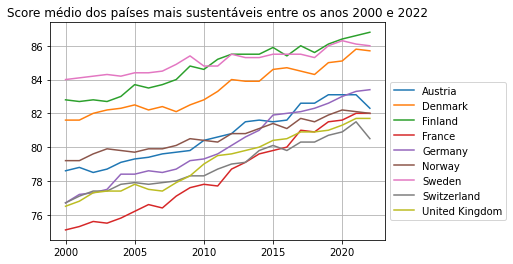

In [22]:
paises_mais_sustentaveis_por_ano = []
for i in scores_paises_ano:
    if scores_paises_ano[i].mean() >= 78.1:
        paises_mais_sustentaveis_por_ano.append(scores_paises_ano[i])
paises_mais_sustentaveis_por_ano = pd.DataFrame(paises_mais_sustentaveis_por_ano)

plt.figure(figsize=(15, 10))
fig = paises_mais_sustentaveis_por_ano.T.plot(kind='line',xlabel='')
fig.set_title('Score médio dos países mais sustentáveis entre os anos 2000 e 2022')
fig.legend(bbox_to_anchor=(1, 0.75))
fig.grid(True)
plt.savefig('dados/mais_sustentaveis_por_ano.png',bbox_inches='tight')

Resumindo todos os países em uma só linha:

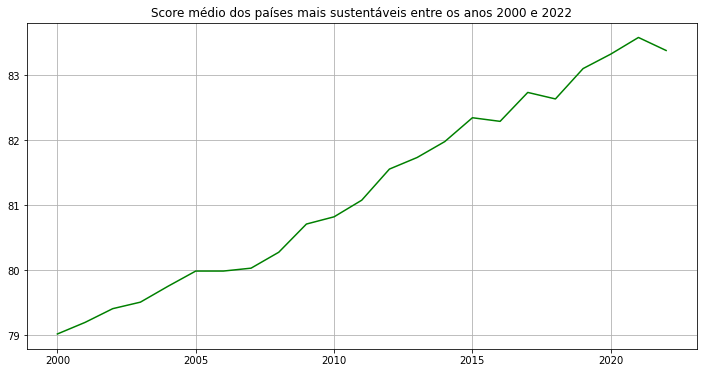

In [23]:
plt.figure(figsize=(12, 6))
fig = paises_mais_sustentaveis_por_ano.mean().plot(kind='line',color='green',xlabel='')
fig.set_title('Score médio dos países mais sustentáveis entre os anos 2000 e 2022')
fig.grid(True)
plt.savefig('dados/mais_sustentaveis_por_ano_medio.png',bbox_inches='tight')

Reunindo todas as informações em um só gráfico:

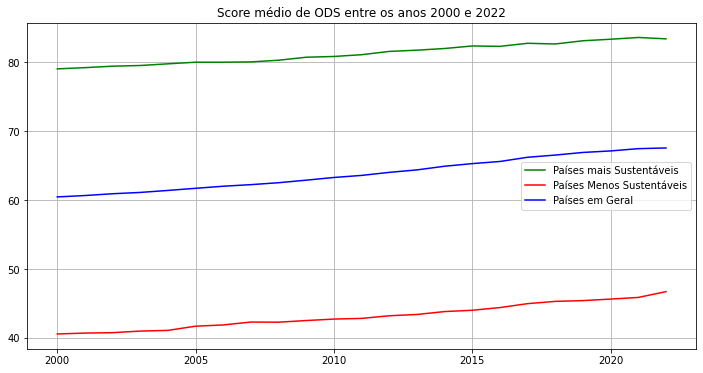

In [39]:
plt.figure(figsize=(12, 6))
fig = paises_mais_sustentaveis_por_ano.mean().plot(kind='line',color='green')
fig = paises_menos_sustentaveis_por_ano.mean().plot(kind='line',color='red')
fig = score_por_ano.plot(kind='line',color='blue',xlabel='')
fig.set_title('Score médio de ODS entre os anos 2000 e 2022')
fig.legend(['Países mais Sustentáveis', 'Países Menos Sustentáveis', 'Países em Geral'])
fig.grid(True)
plt.savefig('dados/score_medio.png',bbox_inches='tight')
plt.show()